In [6]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=11IlTmZbZx3aWyj7SQkd_3exhW49CAae8' \
    -O /content/dataset_gray.csv

will be placed in the single file you specified.

--2021-11-29 05:50:46--  https://docs.google.com/uc?export=download&id=11IlTmZbZx3aWyj7SQkd_3exhW49CAae8
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.113, 74.125.20.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ei7hok8c9bhhfsjeei9j3g354ofkodl2/1638165000000/05754306046710977403/*/11IlTmZbZx3aWyj7SQkd_3exhW49CAae8?e=download [following]
--2021-11-29 05:50:46--  https://doc-0c-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ei7hok8c9bhhfsjeei9j3g354ofkodl2/1638165000000/05754306046710977403/*/11IlTmZbZx3aWyj7SQkd_3exhW49CAae8?e=download
Resolving doc-0c-9s-docs.googleusercontent.com (doc-0c-9s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc

In [7]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=1WLhYOqa22GBcWF5p_ug_K8-eye9D60g6' \
    -O /content/dataset_gray.zip

will be placed in the single file you specified.

--2021-11-29 05:51:01--  https://docs.google.com/uc?export=download&id=1WLhYOqa22GBcWF5p_ug_K8-eye9D60g6
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.113, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b8rpmlp9ditikle1eqdgp92smqbst8ad/1638165000000/05754306046710977403/*/1WLhYOqa22GBcWF5p_ug_K8-eye9D60g6?e=download [following]
--2021-11-29 05:51:05--  https://doc-10-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b8rpmlp9ditikle1eqdgp92smqbst8ad/1638165000000/05754306046710977403/*/1WLhYOqa22GBcWF5p_ug_K8-eye9D60g6?e=download
Resolving doc-10-9s-docs.googleusercontent.com (doc-10-9s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to

In [8]:
import os
import zipfile

local_zip = '/content/dataset_gray.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from shutil import copyfile
import glob

In [10]:
df = pd.read_csv('dataset_gray.csv')  ##dataset_rgb=dataset_gray=dataset_binary
df

,Name,Label
0,g8_p06_00050.png,8
1,g8_p06_00019.png,8
2,g8_p06_00007.png,8
3,g8_p06_00038.png,8
4,g8_p06_00053.png,8
...,...,...
6722,g0_p01_00016.png,0
6723,g0_p01_00082.png,0
6724,g0_p01_00098.png,0
6725,g0_p01_00021.png,0


In [11]:
df = shuffle(df).reset_index(drop=True)
df

,Name,Label
0,g9_p01_00053.png,9
1,g2_p03_00059.png,2
2,g8_p07_00043.png,8
3,g2_p03_00057.png,2
4,g2_p02_00066.png,2
...,...,...
6722,g1_p07_00050.png,1
6723,g4_p05_00050.png,4
6724,g7_p01_00029.png,7
6725,g3_p06_00045.png,3


In [12]:
n_classes = 10

images_per_class = []

for classs in range(0,n_classes):
    images = len(df[df["Label"]==classs])
    images_per_class.append(images)

In [13]:
images_per_class

[818, 656, 689, 630, 600, 769, 670, 637, 707, 551]

In [14]:
print("total number of images:",np.sum(images_per_class))

total number of images: 6727


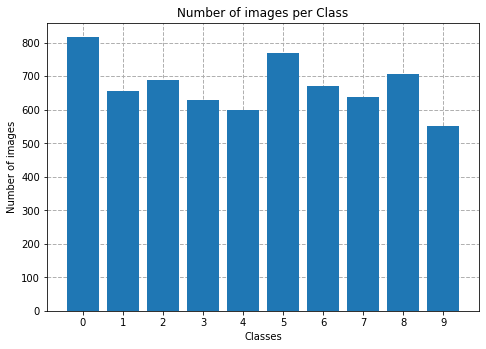

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([0,1,2,3,4,5,6,7,8,9],images_per_class)
ax.set_xticks(np.arange(len(images_per_class)))
plt.rcParams['axes.axisbelow'] = True
plt.grid(linestyle='--', linewidth=1)
ax.set_title('Number of images per Class')
ax.set_ylabel('Number of images')
ax.set_xlabel('Classes')
plt.show()


CLASS  0


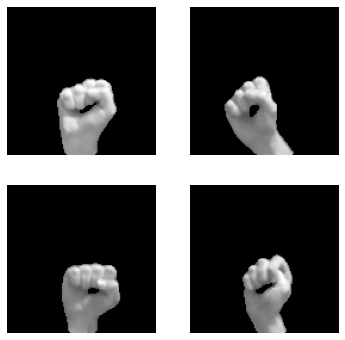

------------------------------------------

CLASS  1


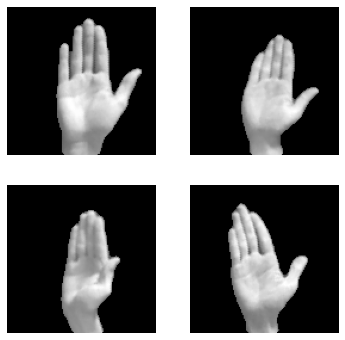

------------------------------------------

CLASS  2


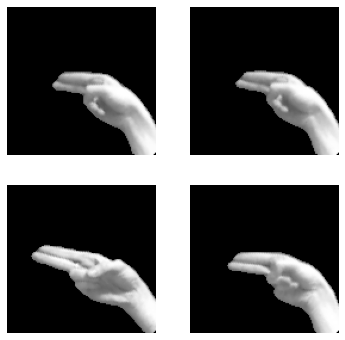

------------------------------------------

CLASS  3


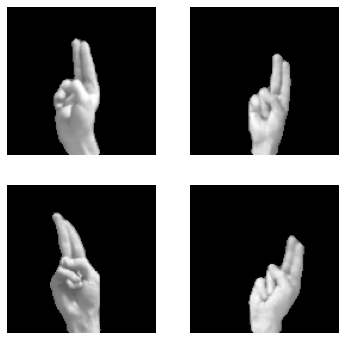

------------------------------------------

CLASS  4


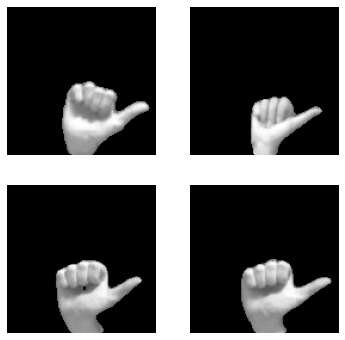

------------------------------------------

CLASS  5


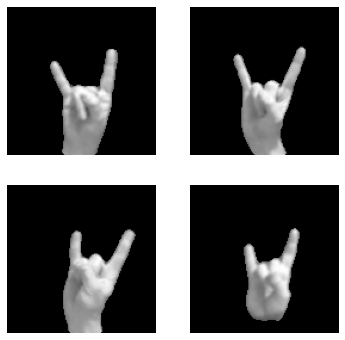

------------------------------------------

CLASS  6


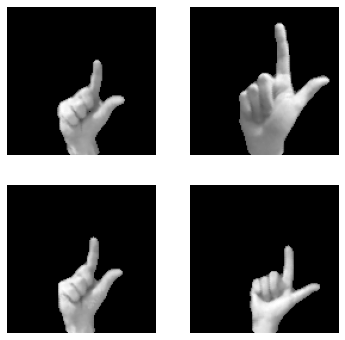

------------------------------------------

CLASS  7


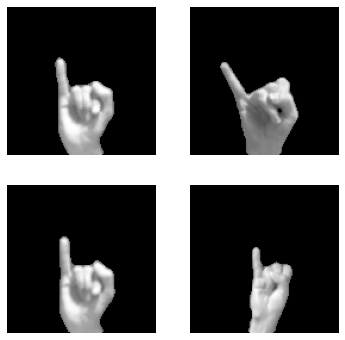

------------------------------------------

CLASS  8


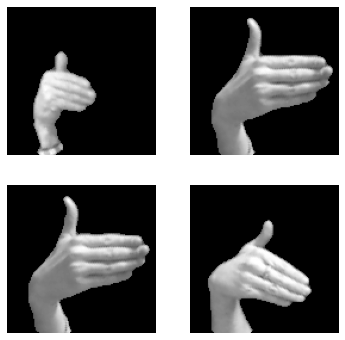

------------------------------------------

CLASS  9


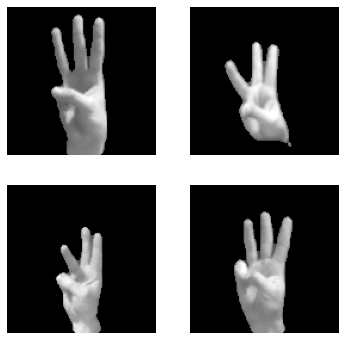

------------------------------------------


In [18]:
for ii in range(0,10):
    
    print("\nCLASS ",ii)
    
    samples_class = df[df["Label"]==ii][0:4]
    samples_class = samples_class.reset_index(drop=True)

    imgs = []
    for idx in range(0,4):
        imgs.append(mpimg.imread("dataset_gray/"+samples_class[["Name"]].iloc[idx][0]))

    _, axs = plt.subplots(2, 2, figsize=(6, 6))
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img, cmap='gray')
        ax.set_axis_off()
    plt.show()
    
    print("------------------------------------------")

In [22]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=16XvPBgm0_ImeB3TmudnV0c2JTMc074wK' \
    -O /content/dataset_gray_split.zip

will be placed in the single file you specified.

--2021-11-29 06:08:08--  https://docs.google.com/uc?export=download&id=16XvPBgm0_ImeB3TmudnV0c2JTMc074wK
Resolving docs.google.com (docs.google.com)... 74.125.20.138, 74.125.20.113, 74.125.20.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sb4ej3pqp52klsrba54phu7hd1qlr1o1/1638166050000/05754306046710977403/*/16XvPBgm0_ImeB3TmudnV0c2JTMc074wK?e=download [following]
--2021-11-29 06:08:20--  https://doc-0k-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sb4ej3pqp52klsrba54phu7hd1qlr1o1/1638166050000/05754306046710977403/*/16XvPBgm0_ImeB3TmudnV0c2JTMc074wK?e=download
Resolving doc-0k-9s-docs.googleusercontent.com (doc-0k-9s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc

In [23]:
import os
import zipfile

local_zip = '/content/dataset_gray_split.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [35]:
import glob

files = []

print('Named explicitly:')
for name in glob.glob('/content/dataset_gray_split/*/*/*'):
    print(name[28:-4])
    files.append(name[28:-4])
  

Streaming output truncated to the last 5000 lines.
train/6/g6_p03_00030
train/6/g6_p02_00052
train/6/g6_p02_00021
train/6/g6_p07_00033
train/6/g6_p04_00061
train/6/g6_p09_00039
train/6/g6_p03_00067
train/6/g6_p01_00004
train/6/g6_p03_00033
train/6/g6_p05_00034
train/6/g6_p06_00080
train/6/g6_p07_00076
train/6/g6_p04_00006
train/6/g6_p07_00013
train/6/g6_p01_00007
train/6/g6_p05_00012
train/6/g6_p07_00002
train/6/g6_p03_00060
train/6/g6_p07_00025
train/6/g6_p05_00032
train/6/g6_p06_00002
train/6/g6_p08_00008
train/6/g6_p01_00057
train/6/g6_p01_00005
train/6/g6_p04_00063
train/6/g6_p03_00008
train/6/g6_p08_00019
train/6/g6_p06_00017
train/6/g6_p01_00045
train/6/g6_p06_00061
train/6/g6_p02_00024
train/6/g6_p10_00035
train/6/g6_p06_00072
train/6/g6_p04_00049
train/6/g6_p09_00032
train/6/g6_p08_00003
train/6/g6_p03_00070
train/6/g6_p01_00019
train/6/g6_p11_00006
train/6/g6_p02_00070
train/6/g6_p03_00077
train/6/g6_p02_00005
train/6/g6_p07_00010
train/6/g6_p03_00066
train/6/g6_p05_00048
trai

In [36]:
files

['train/1/g1_p07_00052',
 'train/1/g1_p07_00003',
 'train/1/g1_p04_00054',
 'train/1/g1_p01_00022',
 'train/1/g1_p05_00086',
 'train/1/g1_p03_00024',
 'train/1/g1_p07_00056',
 'train/1/g1_p01_00039',
 'train/1/g1_p04_00010',
 'train/1/g1_p03_00014',
 'train/1/g1_p04_00013',
 'train/1/g1_p08_00025',
 'train/1/g1_p05_00007',
 'train/1/g1_p02_00036',
 'train/1/g1_p10_00014',
 'train/1/g1_p04_00066',
 'train/1/g1_p08_00024',
 'train/1/g1_p09_00012',
 'train/1/g1_p06_00037',
 'train/1/g1_p05_00030',
 'train/1/g1_p01_00049',
 'train/1/g1_p05_00009',
 'train/1/g1_p02_00028',
 'train/1/g1_p02_00068',
 'train/1/g1_p01_00011',
 'train/1/g1_p04_00017',
 'train/1/g1_p07_00053',
 'train/1/g1_p01_00038',
 'train/1/g1_p10_00004',
 'train/1/g1_p05_00026',
 'train/1/g1_p07_00078',
 'train/1/g1_p02_00016',
 'train/1/g1_p01_00081',
 'train/1/g1_p03_00047',
 'train/1/g1_p04_00001',
 'train/1/g1_p01_00018',
 'train/1/g1_p01_00089',
 'train/1/g1_p05_00038',
 'train/1/g1_p06_00025',
 'train/1/g1_p05_00063',
